In [206]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine = pd.read_csv('winequality-red.csv')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print("Unique values in quality:", sorted(wine.quality.unique()))

Unique values in quality: [3, 4, 5, 6, 7, 8]


In [4]:
wine['quality'] = wine['quality'].apply(lambda value: 'low' if value < 5 else 'medium' if value < 7 else 'high')

In [5]:
wine.quality.value_counts()

quality
medium    1319
high       217
low         63
Name: count, dtype: int64

In [6]:
X = wine.drop('quality', axis=1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
features = wine.drop('quality', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
scaled_features[:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

In [13]:
pca_2_comp = PCA(n_components=2)
reduced_2 = pca_2_comp.fit_transform(scaled_features)

In [25]:
pca_2d = pd.DataFrame(data=reduced_2, columns=['PC1', 'PC2'])
pca_2d['quality'] = wine['quality']

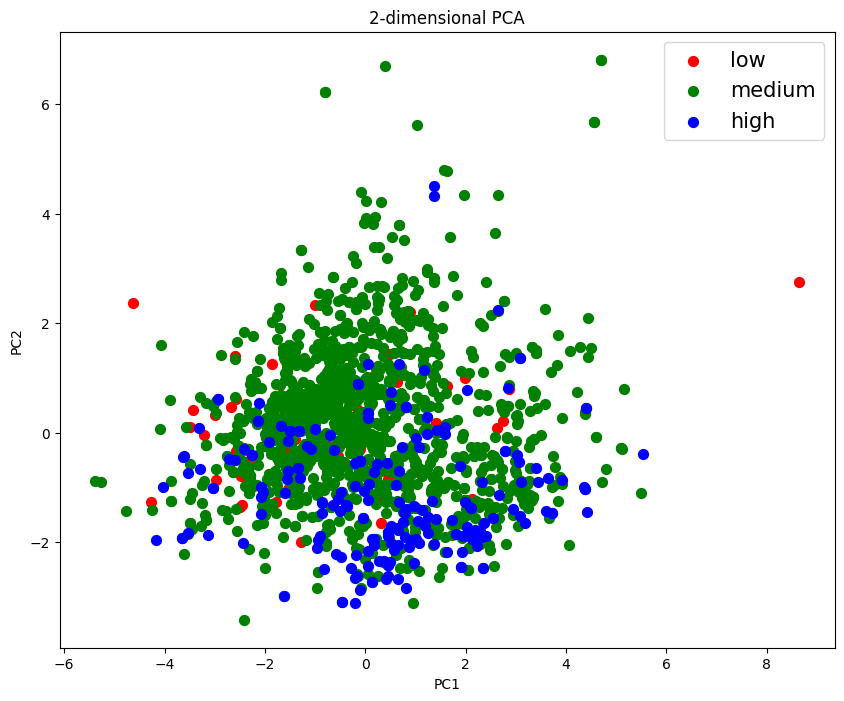

In [27]:
fig = plt.figure(figsize=(10, 10))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2-dimensional PCA')

targets = ['low', 'medium', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = pca_2d['quality'] == target
    plt.scatter(pca_2d.loc[indicesToKeep, 'PC1'], pca_2d.loc[indicesToKeep, 'PC2'], c=color, s=50)

plt.legend(targets, prop={'size': 15})
plt.show()

In [15]:
pca_3_comp = PCA(n_components=3)
reduced_3 = pca_3_comp.fit_transform(scaled_features)

In [16]:
pca_3d = pd.DataFrame(data=reduced_3, columns=['PC1', 'PC2', 'PC3'])
pca_3d['quality'] = wine['quality']

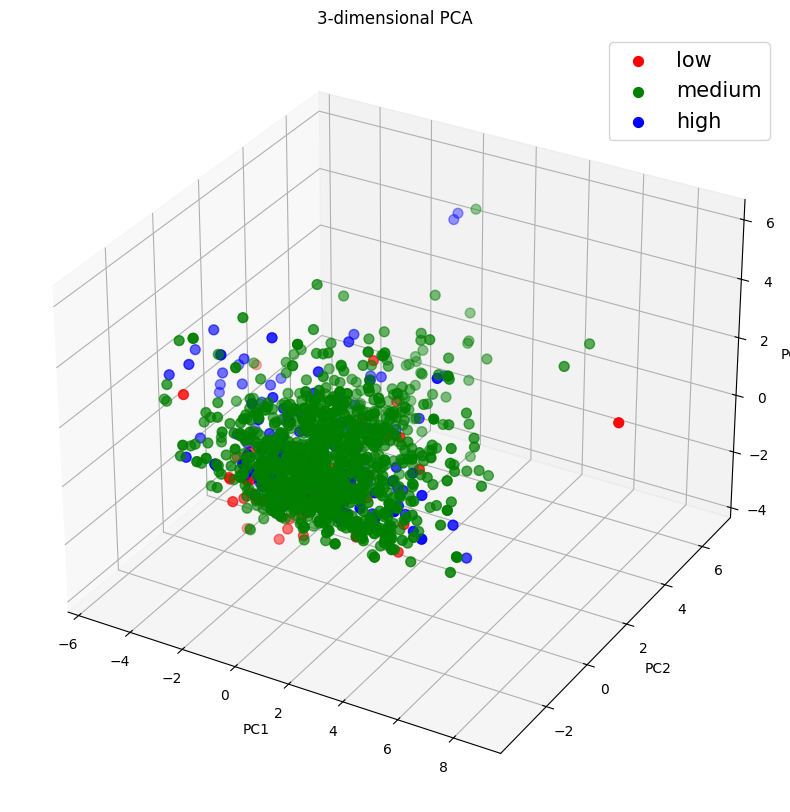

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = {'low': 'red', 'medium': 'green', 'high': 'blue'}
for quality, color in colors.items():
    subset = pca_3d[pca_3d['quality'] == quality]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], c=color, s=50)
    
ax.set_title("3-dimensional PCA")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(colors.keys(), prop={'size': 15})
plt.show()

In [18]:
tsne_2_comp = TSNE(n_components=2, perplexity=50)
tsne_2 = tsne_2_comp.fit_transform(scaled_features)

In [19]:
tsne_2d = pd.DataFrame(data=tsne_2, columns=['t-SNE1', 't-SNE2'])
tsne_2d['quality'] = wine['quality']

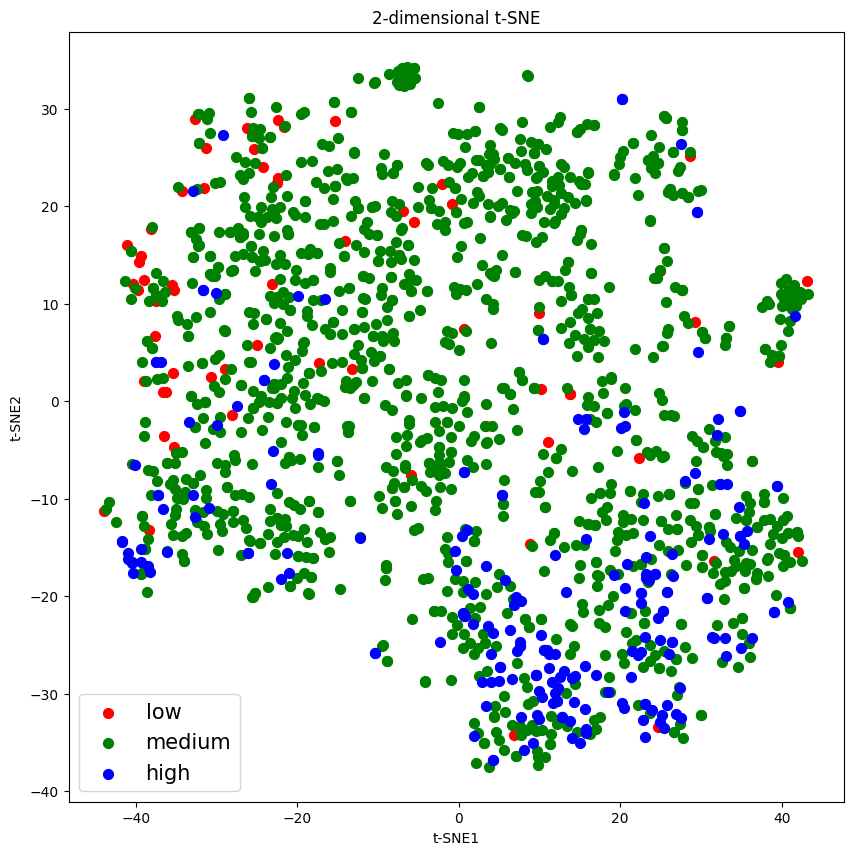

In [42]:
fig = plt.figure(figsize=(10, 10))

plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('2-dimensional t-SNE')

targets = ['low', 'medium', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = tsne_2d['quality'] == target
    plt.scatter(tsne_2d.loc[indicesToKeep, 't-SNE1'], tsne_2d.loc[indicesToKeep, 't-SNE2'], c=color, s=50)

plt.legend(targets, prop={'size': 15})
plt.show()

In [21]:
tsne_3_comp = TSNE(n_components=3, perplexity=50)
tsne_3 = tsne_3_comp.fit_transform(scaled_features)

In [22]:
tsne_3d = pd.DataFrame(data=tsne_3, columns=['t-SNE1', 't-SNE2', 't-SNE3'])
tsne_3d['quality'] = wine['quality']

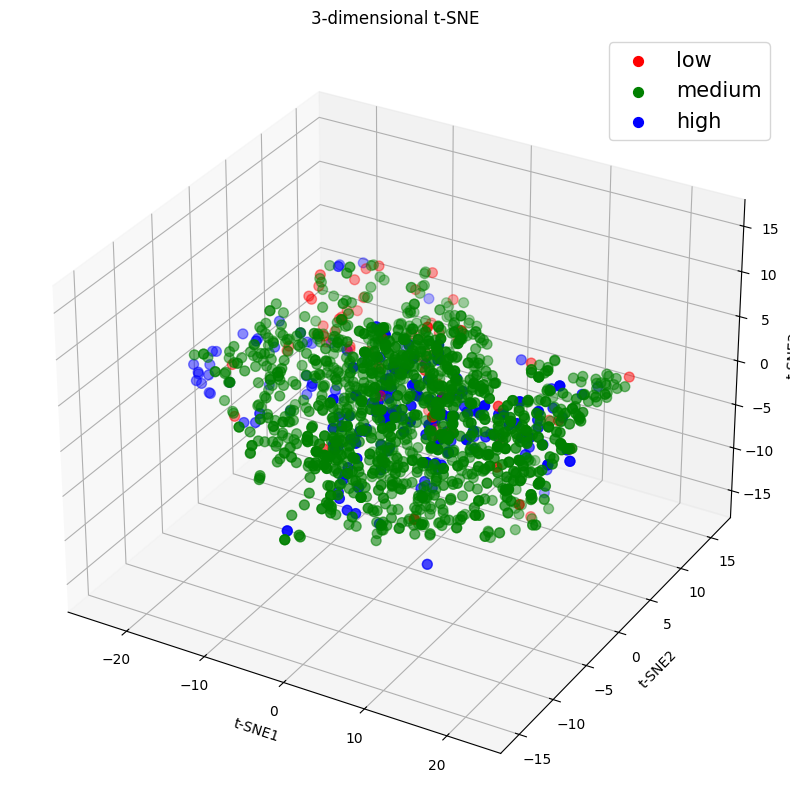

In [43]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = {'low': 'red', 'medium': 'green', 'high': 'blue'}
for quality, color in colors.items():
    subset = tsne_3d[tsne_3d['quality'] == quality]
    ax.scatter(subset['t-SNE1'], subset['t-SNE2'], subset['t-SNE3'], c=color, s=50)
    
ax.set_title("3-dimensional t-SNE")
ax.set_xlabel('t-SNE1')
ax.set_ylabel('t-SNE2')
ax.set_zlabel('t-SNE3')
ax.legend(colors.keys(), prop={'size': 15})
plt.show()

In [165]:
def plot_kmeans(kmeans, X, ax=None):
    labels = kmeans.fit_predict(X)

    plt.figure(figsize=(10, 10))

    ax = ax or plt.gca()
    ax.axis('equal')

    cmap = plt.cm.get_cmap('viridis', kmeans.n_clusters)

    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=cmap, zorder=2)

    centers = kmeans.cluster_centers_

    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5, zorder=3)
    
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]

    for i, (c, r) in enumerate(zip(centers, radii)):
        edge_color = cmap(i)
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1, edgecolor=edge_color))
    
    plt.show()

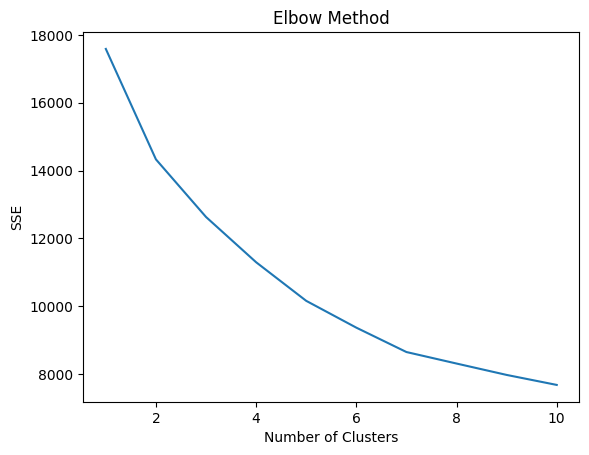

In [177]:
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [104]:
pca_2d.head()

,PC1,PC2,quality
0,-1.619530,0.450950,medium
1,-0.799170,1.856553,medium
2,-0.748479,0.882039,medium
3,2.357673,-0.269976,medium
4,-1.619530,0.450950,medium


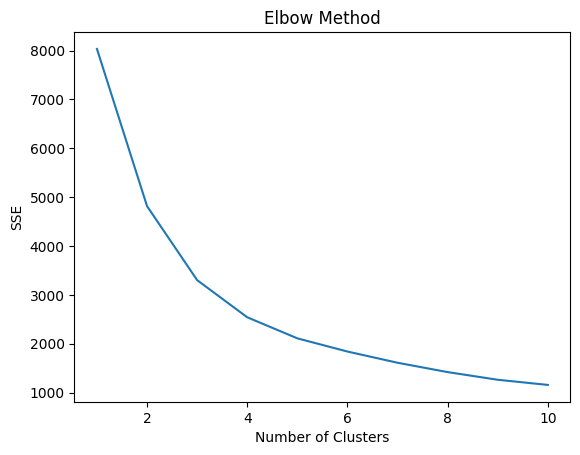

In [178]:
pca_2_train = pca_2d.drop('quality', axis=1)

sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_2_train)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [179]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_2_train)

KMeans(n_clusters=3)

In [136]:
centers = kmeans.cluster_centers_

print(centers)

[[-1.35871894 -0.38033131]
 [ 0.17256527  1.6374455 ]
 [ 1.9767571  -0.89732197]]


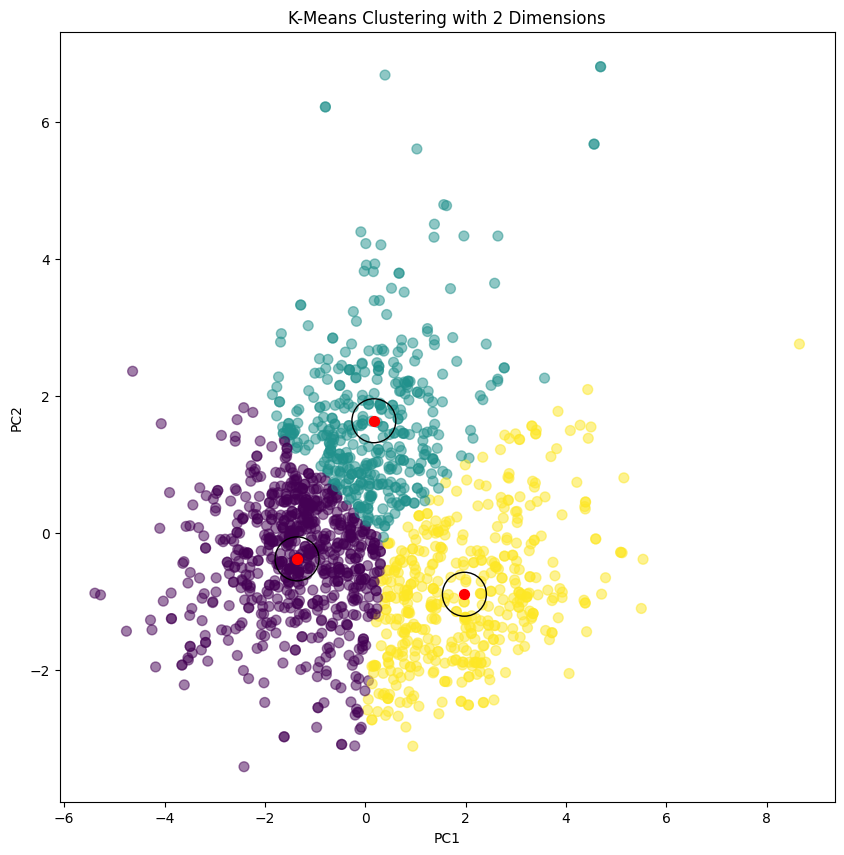

In [141]:
plt.figure(figsize=(10, 10))

plt.scatter(pca_2d['PC1'], pca_2d['PC2'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], facecolors='none', edgecolors='black', s=1000)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering with 2 Dimensions')
plt.show()

In [142]:
kmeans_labels = kmeans.labels_
actual_labels = pca_2d['quality']

actual_labels = actual_labels.apply(lambda value: 0 if value == 'low' else 1 if value == 'medium' else 2)

accuracy_score = np.mean(kmeans_labels == actual_labels)

print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.3452157598499062


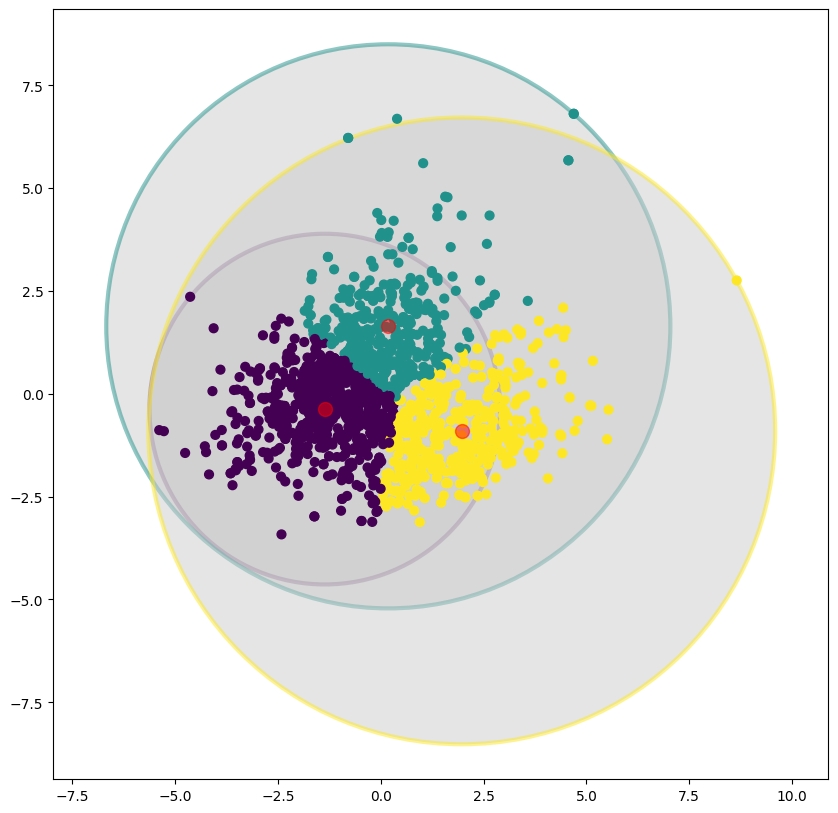

In [184]:
plot_kmeans(KMeans(n_clusters=3), reduced_2)

In [187]:
pca_3d.head()

,PC1,PC2,PC3,quality
0,-1.619530,0.450950,-1.774454,medium
1,-0.799170,1.856553,-0.911690,medium
2,-0.748479,0.882039,-1.171394,medium
3,2.357673,-0.269976,0.243489,medium
4,-1.619530,0.450950,-1.774454,medium


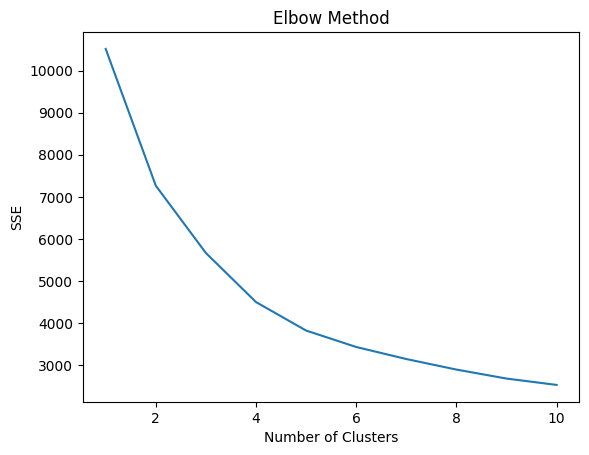

In [188]:
pca_3_train = pca_3d.drop('quality', axis=1)

sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_3_train)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [189]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_3_train)

KMeans(n_clusters=3)

In [190]:
centers = kmeans.cluster_centers_

print(centers)

[[-1.38610164 -0.1929195  -0.38281287]
 [ 0.37390219  1.65370209  0.6018029 ]
 [ 1.78954927 -1.02828656  0.09664187]]


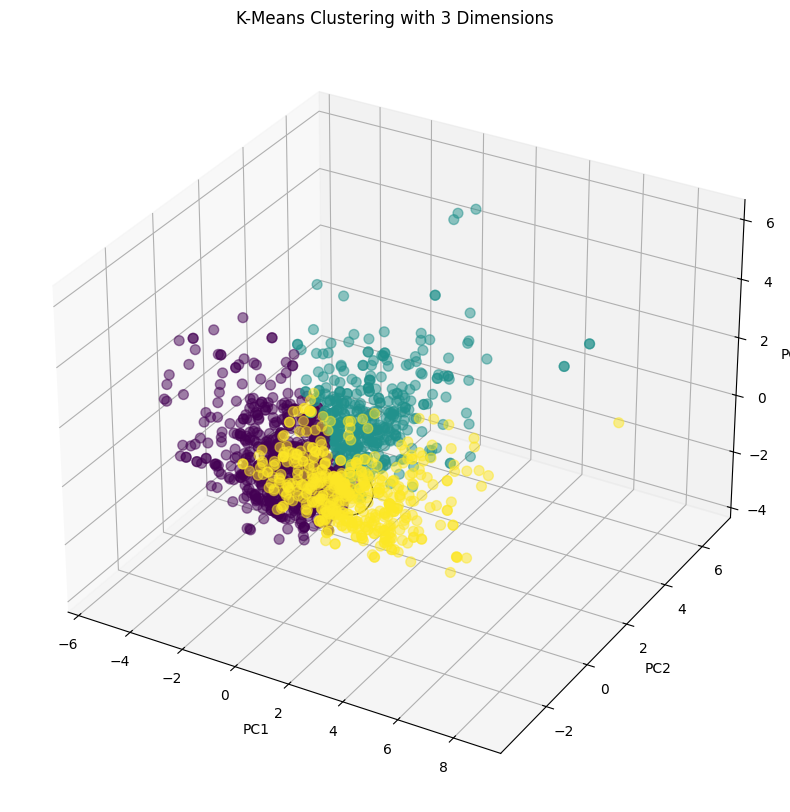

In [191]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_3d['PC1'], pca_3d['PC2'], pca_3d['PC3'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], facecolors='none', edgecolors='black', s=1000)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('K-Means Clustering with 3 Dimensions')
plt.show()

In [192]:
kmeans_labels = kmeans.labels_
actual_labels = pca_3d['quality']

actual_labels = actual_labels.apply(lambda value: 0 if value == 'low' else 1 if value == 'medium' else 2)

accuracy_score = np.mean(kmeans_labels == actual_labels)

print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.32770481550969355


In [193]:
tsne_2d.head()

,t-SNE1,t-SNE2,quality
0,-24.820536,18.939028,medium
1,-9.266350,25.390675,medium
2,-9.640646,23.875736,medium
3,24.467762,-5.149342,medium
4,-24.822294,18.937096,medium


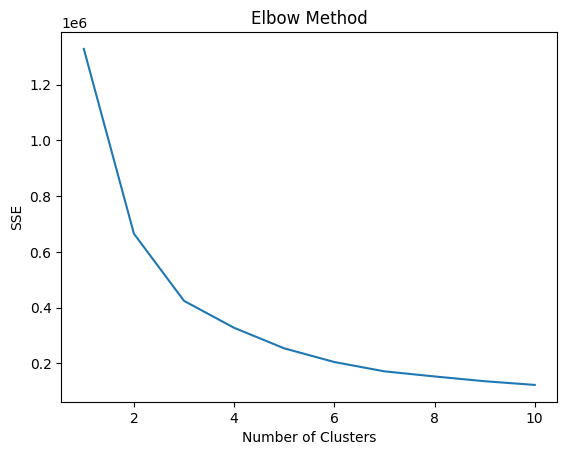

In [194]:
tsne_2_train = tsne_2d.drop('quality', axis=1)

sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tsne_2_train)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [195]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(tsne_2_train)

KMeans(n_clusters=3)

In [196]:
centers = kmeans.cluster_centers_

print(centers)

[[-22.302767    3.7879941]
 [ 18.58243   -19.337236 ]
 [ 12.803677   16.855145 ]]


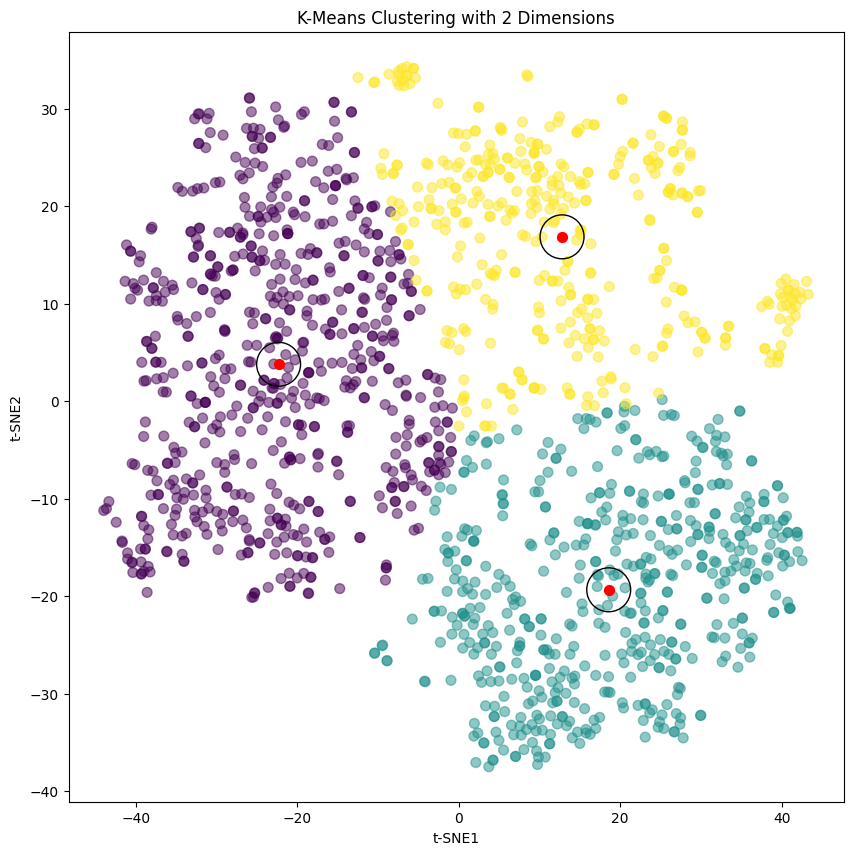

In [197]:
plt.figure(figsize=(10, 10))

plt.scatter(tsne_2d['t-SNE1'], tsne_2d['t-SNE2'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], facecolors='none', edgecolors='black', s=1000)

plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('K-Means Clustering with 2 Dimensions')
plt.show()

In [198]:
kmeans_labels = kmeans.labels_
actual_labels = tsne_2d['quality']

actual_labels = actual_labels.apply(lambda value: 0 if value == 'low' else 1 if value == 'medium' else 2)

accuracy_score = np.mean(kmeans_labels == actual_labels)

print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.2614133833646029


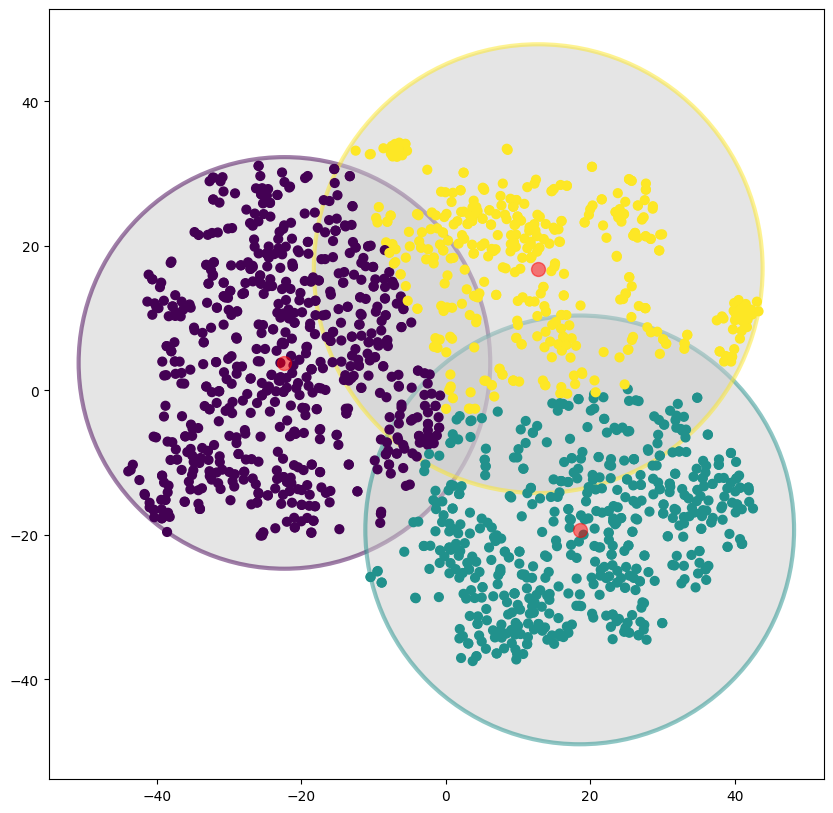

In [199]:
plot_kmeans(KMeans(n_clusters=3), tsne_2)

In [200]:
tsne_3d.head()

,t-SNE1,t-SNE2,t-SNE3,quality
0,-8.794882,8.925656,-4.478870,medium
1,-1.689112,12.817478,-3.921387,medium
2,-1.532811,11.650745,-3.311572,medium
3,11.178139,0.141546,0.439678,medium
4,-9.171106,8.670148,-4.274937,medium


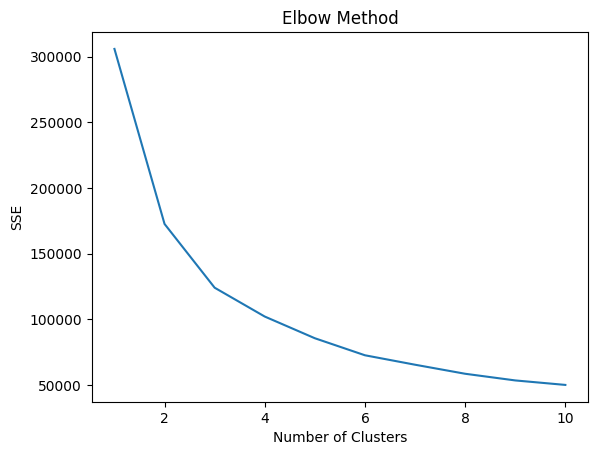

In [201]:
tsne_3_train = tsne_3d.drop('quality', axis=1)

sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tsne_3_train)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [202]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(tsne_3_train)

KMeans(n_clusters=3)

In [203]:
centers = kmeans.cluster_centers_

print(centers)

[[  2.8823605    3.4234698   -5.363471  ]
 [-11.333863     2.3785722   -0.28031933]
 [  9.627821    -5.905224     5.1416626 ]]


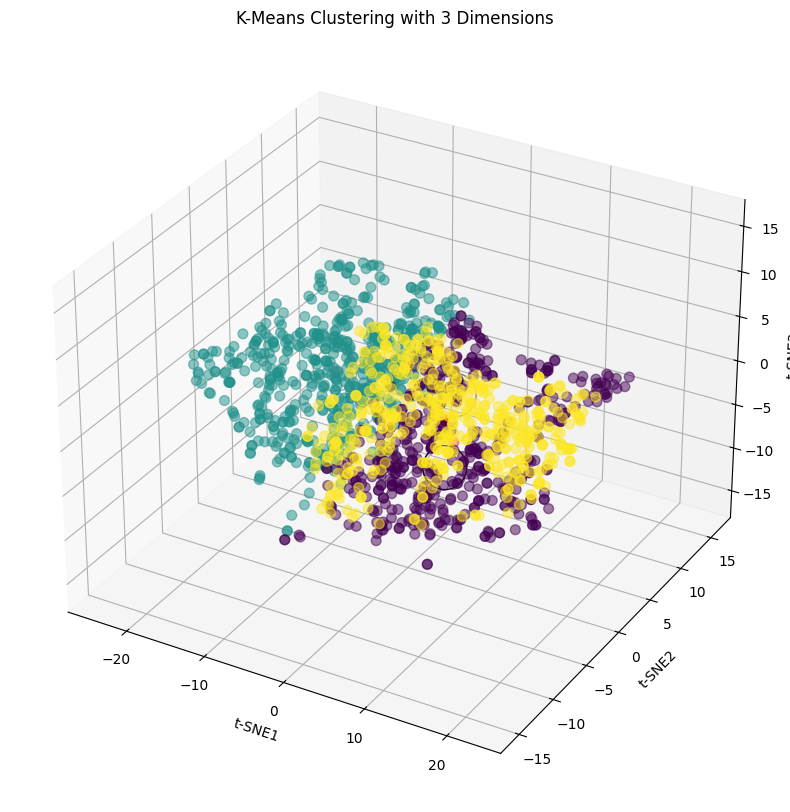

In [204]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tsne_3d['t-SNE1'], tsne_3d['t-SNE2'], tsne_3d['t-SNE3'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], facecolors='none', edgecolors='black', s=1000)

ax.set_xlabel('t-SNE1')
ax.set_ylabel('t-SNE2')
ax.set_zlabel('t-SNE3')
ax.set_title('K-Means Clustering with 3 Dimensions')
plt.show()

In [205]:
kmeans_labels = kmeans.labels_
actual_labels = tsne_3d['quality']

actual_labels = actual_labels.apply(lambda value: 0 if value == 'low' else 1 if value == 'medium' else 2)

accuracy_score = np.mean(kmeans_labels == actual_labels)

print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.41088180112570355
